# INSTABOT - 2

In [2]:
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait as wdw
from selenium.common.exceptions import TimeoutException as TE
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup as bs 
import time
from datetime import datetime,timedelta
from collections import OrderedDict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
driver = wb.Chrome()
driver.maximize_window()

In [27]:
driver.get("https://www.instagram.com/")

In [28]:
username = 'sample username'
password = 'sample password'

In [29]:
wait = wdw(driver,10)

In [20]:
def LOG_IN(username,password):
    try :
#       locating username textbox and sending username to it 
        user = wait.until(EC.presence_of_element_located((By.NAME,'username')))
        user.send_keys(username)
#       locating pass textbox and sending the password
        pw = driver.find_element(By.NAME,'password')
        pw.send_keys(password)
        #locating login button 
        button = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div')))
        button.submit()
        #Save Your Login Info? : Not Now
        pop = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_ac8f')))
        pop.click()
        #turn on notification? : not now #if logging in for first time pls enable this else let it be in comment
#         ntfn = wait.until(EC.presence_of_element_located((By.XPATH,'//div/button[@class = "_a9-- _a9_1"]')))
#         ntfn.click()
    except TE:
        print("Something went wrong! Try Again")

In [30]:
LOG_IN(username,password) #login to instagram

In [9]:
def search_button():
    driver.find_element(By.LINK_TEXT,'Search').click()

In [10]:
def open_search_profile(s):
    try:
        #locating search box bar and sending text 
#         time.sleep(2)
#         driver.find_element(By.LINK_TEXT,'Search').click()
        time.sleep(5)
        srch = wait.until(EC.presence_of_element_located((By.XPATH, '//input[contains(@class, "x1lugfcp ")]')))
        srch.send_keys(s)
        #locating searched result
        time.sleep(3)
        pro = wait.until(EC.presence_of_element_located((By.XPATH,"//div/span[@class = 'x1lliihq x1plvlek xryxfnj x1n2onr6 x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj']")))
        time.sleep(3)
        pro.click()
        #         print(len(pro))
        #locating the given profile
#         for i in pro:
#             time.sleep(3)
#             if i.text == s:
#                 i.click()
#                 break
        time.sleep(3)        
    except TE:
        print("No Search Found")

## PROBLEM - 1

Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
2. Now Find the number of posts these handles have done in the previous 3 days.
3. Depict this information using a suitable graph

### 1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [11]:
#First 10 handles from project part-1
handle = ['ohmyfoodiefood','dilsefoodie','foodrooaster','fooderati','thefoodmedic','yourfoodlab','food'
          ,'foodiechina888','harrodsfood','food52']

In [23]:
#function for getting top 5 handle which have highest number of followers
def top_5_handles(list):
    try:
        #dct will contains username and number of followers
        dct = {}
#         search_button()
        search_button()
        for i in list :
            #This fuction will search a user and open that profile
            time.sleep(5)
            open_search_profile(i)
            time.sleep(2)
            #locating followers of user
            followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_ac2a')))[1]
            #replacing ',' with '' and converted into int
            dct[i] = int(followers.get_attribute('title').replace(',' , ''))
            driver.find_element(By.XPATH,'//div[@class = "_aawn _9-lv"]').click()
        #top 5 most followed user
        count = 0
        res = OrderedDict()
        for i in sorted(dct, key=dct.get, reverse=True):
            res[i] = dct[i]
            count += 1
            if(count >= 5) : 
                break
                
        return res
    except TE :
        print ("Something went wrong! Try Again")

In [33]:
top_handle = top_5_handles(handle)

In [34]:
print('Top 5 instagram handles which have the highest number of followers :')
for names in top_handle:
    print(names,'-',top_handle[names])

Top 5 instagram handles which have the highest number of followers :
food52 - 3645072
yourfoodlab - 2709702
foodiechina888 - 2425064
dilsefoodie - 1138704
thefoodmedic - 623102


### 2.Now Find the number of posts these handles have done in the previous 3 days.

In [35]:
#this function returns number of post posted by user in n days
def count_of_post(no_of_day):
    try :
        #locating first post
        post = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_aagu')))
#         post.click()
        
        count = 0 
        while True :
#             print('step - 1')
            post[count].click()
            time.sleep(3)
#             print('step - 2')
            #getting date of the the post
            temp = wait.until(EC.presence_of_element_located((By.XPATH,'//time[@class = "_aaqe"]')))
            #getting date in string format
#             time.sleep(3)
            date_string = temp.get_attribute('datetime')
            #converting date string obtained above into date format i.e year-month-date time upto seconds
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            #taking differnce between today's date and post posted date
            day = (datetime.now() - date).days
#             print('done')
            if day > no_of_day :
                break
            count += 1
            #locating next button
            time.sleep(2)
#             print('doing')
            close = driver.find_elements(By.XPATH,"//div[@class = 'x6s0dn4 x78zum5 xdt5ytf xl56j7k']")
            for j in close:
                cl = bs(j.get_attribute("innerHTML"),"html.parser").svg['aria-label']
                if cl == "Close":
                    j.click()
                    break
#             print('end')
        return count
    
    except TE :
        print ("Something went wrong! Try Again")

In [38]:
total_count_dict = {}
for i in top_handle:
    search_button()
    time.sleep(2)
    open_search_profile(i)
    time.sleep(3)
    count = count_of_post(3)
    close = driver.find_elements(By.XPATH,"//div[@class = 'x6s0dn4 x78zum5 xdt5ytf xl56j7k']")
    for j in close:
        cl = bs(j.get_attribute("innerHTML"),"html.parser").svg['aria-label']
        if cl == "Close":
            j.click()
            break
    total_count_dict[i] = count

In [39]:
total_count_dict

{'food52': 0,
 'yourfoodlab': 4,
 'foodiechina888': 0,
 'dilsefoodie': 3,
 'thefoodmedic': 0}

In [40]:
print('Number of posts these handles have done in the previous 3 days :')
for i in total_count_dict:
    print(i,'-',total_count_dict[i])

Number of posts these handles have done in the previous 3 days :
food52 - 0
yourfoodlab - 4
foodiechina888 - 0
dilsefoodie - 3
thefoodmedic - 0


### 3.Depict this information using a suitable graph

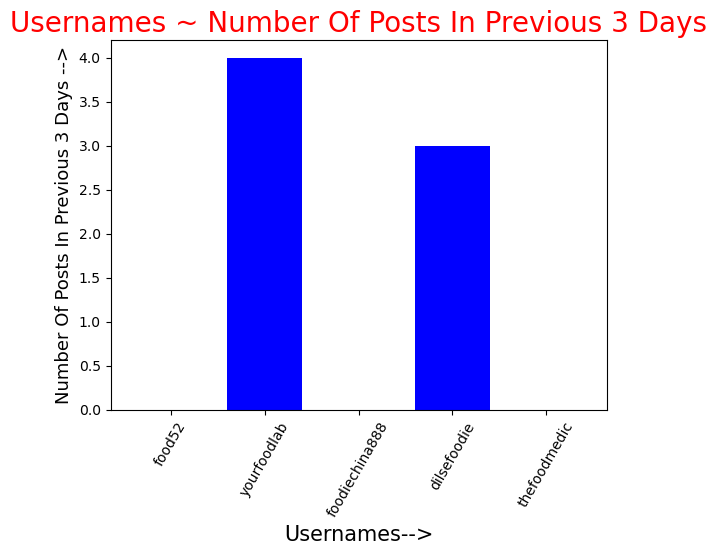

In [93]:
# Using total_count_dict's keys and values to create the bar graph
plt.bar(total_count_dict.keys(),total_count_dict.values(),color = 'b')
plt.ylabel('Number Of Posts In Previous 3 Days -->',size = 13)
plt.xlabel('Usernames-->',size = 15)
plt.title('Usernames ~ Number Of Posts In Previous 3 Days',size = 20,color = 'red',alpha = 1.0)
plt.xticks(rotation=60)
plt.show()

# --------------------------------------------------------------------------------------------------------------

## PROBLEM - 2

Your friend also needs a list of hashtags that he should use in his posts.
1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
3. Create a csv file with two columns : the word and its frequency
4. Now, find the hashtags that were most popular among these bloggers
5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

### 1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [43]:
def extract_post_content(handle):
    try:
        content_list = []
        for username in handle:
            #this part open search button and searches the username and opens the profile
            search_button()
            time.sleep(2)
            open_search_profile(username)
            #scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating posts in the user page
            posts = driver.find_elements(By.CLASS_NAME,'_aagu')
            time.sleep(3)
            for post in posts[:10]:
                time.sleep(2)
                post.click()
                time.sleep(3)
                #locating the contentor hashtags of the post
                hashtags = wait.until(EC.presence_of_all_elements_located((By.XPATH,'//li[@class = "_a9zj _a9zl  _a9z5"]//div[@class = "_a9zs"]/h1/a')))
                for hashtag in hashtags:
                    content_list.append(hashtag.text)
            # Closing the Post
                close = driver.find_elements(By.XPATH,"//div[@class = 'x6s0dn4 x78zum5 xdt5ytf xl56j7k']")
                for j in close:
                    cl = bs(j.get_attribute("innerHTML"),"html.parser").svg['aria-label']
                    if cl == "Close":
                        j.click()
                        break
        return content_list
    except TE:
        print("Something Went Wrong!")

In [45]:
#the fifth user is having some problem due to which only four users are considered
handle = list(total_count_dict.keys())
hashtags = extract_post_content(handle[:4])

In [47]:
un = ['thefoodmedic ']
h = extract_post_content(un) 

Something Went Wrong!


In [46]:
print(hashtags)

['@inagarten', '@isabel.c.montes', '#f52community', '@annabillingskog', '#f52community', '#f52grams', '@oliviamackmccool', '#f52community', '@emilydrydenphoto', '#f52community', '#f52grams', '@nigellalawson', '#geniusrecipe', '@miglorious', '@jamesransom_nyc', '#f52community', '#f52grams', '@jun.and.tonic', '#f52community', '#f52grams', '@ottolenghi', '@ivo_bisignano', '@serax_official', '@posiehh', '@posiehh', '#f52community', '#f52grams', '@jamesransom_nyc', '#f52community', '#f52grams', '@ladyandpups', '#f52community', '#f52grams', '@yflhome', '@jemimahrodrigues', '@bigbasketcom', '@jemimahrodrigues', '#chefitup', '#yourfoodlab', '#cookingchallenge', '@yflhome', '@sanjyotkeer', '#yourfoodlab', '#newlaunch', '#trynow', '#kitchenupgrade', '#kitchenessentials', '#kitchenaesthetic', '#stunning', '#upgradeyourkitchen', '#kitchengadgets', '#futuristicstyle', '#bladesofglory', '#sanjyotkeer', '#blender', '#yflhome', '#yourfoodlab', '#kitchenupgrade', '#kitchenessentials', '#kitchenaestheti

### 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [48]:
hashtag_dict = {}

words_list = []
for hashes in hashtags:
    hashtag_dict[hashes] = hashtag_dict.get(hashes,0) + 1
    
for i in sorted(hashtag_dict, key=hashtag_dict.get, reverse=True):
    words_list.append([i,hashtag_dict[i]])
    print(i,hashtag_dict[i])

#cooking 10
#chinesefood 10
#f52community 9
#dilsefoodie 9
#f52grams 7
#food 6
#yourfoodlab 5
#recipe 5
#easyrecipes 5
#streetfood 5
#eggrecipes 4
#dilsecouple 4
#foodfood 4
@jemimahrodrigues 3
@karishmaktanna 3
@jamesransom_nyc 2
@posiehh 2
@yflhome 2
@bigbasketcom 2
#chefitup 2
#cookingchallenge 2
@sanjyotkeer 2
#kitchenupgrade 2
#kitchenessentials 2
#kitchenaesthetic 2
#stunning 2
#upgradeyourkitchen 2
#kitchengadgets 2
#sanjyotkeer 2
#blender 2
#yflhome 2
#YFLhome 2
#spicyfood 2
#snack 2
#comfortfood 2
#breakfast 2
@inagarten 1
@isabel.c.montes 1
@annabillingskog 1
@oliviamackmccool 1
@emilydrydenphoto 1
@nigellalawson 1
#geniusrecipe 1
@miglorious 1
@jun.and.tonic 1
@ottolenghi 1
@ivo_bisignano 1
@serax_official 1
@ladyandpups 1
#newlaunch 1
#trynow 1
#futuristicstyle 1
#bladesofglory 1
#techupgrade 1
@yashrajmukhate 1
@tanmaybhat 1
#ChefItUp 1
#Season2 1
#CookingChallenge 1
#MonsoonsWithSanjyot 1
#StreetFood 1
#YFL 1
#jelly 1
#noodles 1
#summerrecipes 1
#rice 1
#ricerecipes 1
#li

### 3.Create a csv file with two columns : the word and its frequency

In [49]:
dataframe = pd.DataFrame(words_list,columns = ['Word','Frequency'])
#conveting the above dataframe to csv using ->to_csv
dataframe.to_csv('words_frequency.csv',index = False)
dataframe.head(10)

,Word,Frequency
0,#cooking,10
1,#chinesefood,10
2,#f52community,9
3,#dilsefoodie,9
4,#f52grams,7
5,#food,6
6,#yourfoodlab,5
7,#recipe,5
8,#easyrecipes,5
9,#streetfood,5


### 4.Now, find the hashtags that were most popular among these bloggers

In [50]:
print(words_list[0][0])

#cooking


### 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts

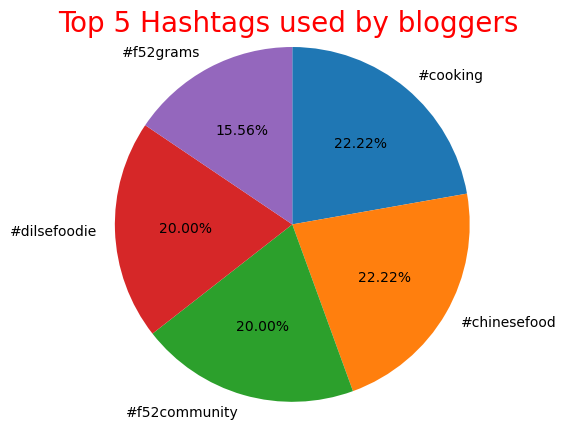

In [54]:
#used values we got in Q2.2 to get the folloiwng pie chart
hash_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.pie(count,labels=hash_name,autopct='%0.2f%%',radius=1.2,counterclock=False,startangle=90)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='red',alpha=1.0)
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# PROBLEM - 3

You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:
1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
2. Calculate the average likes for a handle.
3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
4. Create a bar graph to depict the above obtained information.

### 1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [68]:
def finding_likes(user):
    try:
        likes = []
        #clicking on search button and opening the user profile
        search_button()
        open_search_profile(user)
        #scrolling for the post
        driver.execute_script('window.scrollTo(0, 3000);')
        time.sleep(2)
        driver.execute_script('window.scrollTo(0, -3000);')
        time.sleep(2)
        #locating post and clicking upto 10 posts
        posts = driver.find_elements(By.CLASS_NAME,'_aagu')
        for post in posts[:10]:
            time.sleep(2)
            post.click()
            time.sleep(3)
            try:
                #finding like on video and extracting it
                like = wait.until(EC.presence_of_element_located((By.XPATH,'//span[@class = "x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]/span')))
                no_of_like = (like.text).replace(',','')
                likes.append(int(no_of_like))
                time.sleep(2)
                close = driver.find_elements(By.XPATH,"//div[@class = 'x6s0dn4 x78zum5 xdt5ytf xl56j7k']")
                for j in close:
                    cl = bs(j.get_attribute("innerHTML"),"html.parser").svg['aria-label']
                    if cl == "Close":
                        j.click()
                        break
            except TE:
                #finding like on image and extracting it
                like = wait.until(EC.presence_of_element_located((By.XPATH,'//span[@class = "x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]/span')))
                no_of_like = (like.text).replace(',','')
                likes.append(int(no_of_like))
                time.sleep(2)
                close = driver.find_elements(By.XPATH,"//div[@class = 'x6s0dn4 x78zum5 xdt5ytf xl56j7k']")
                for j in close:
                    cl = bs(j.get_attribute("innerHTML"),"html.parser").svg['aria-label']
                    if cl == "Close":
                        j.click()
                        break
        return likes
    except TE:
        print('Something Went Wrong!')

In [62]:
def finding_likes(user):
    try:
        likes = []
        #clicking on search button and opening the user profile
        search_button()
        open_search_profile(user)
        #scrolling for the post
        driver.execute_script("window.scrollTo(0,3000);")
        time.sleep(2)
        driver.execute_script("window.scrollTo(0.-3000);")
        time.sleep(2)
        #locating post and clicking upto 10 posts
        posts = driver.find_elements(By.CLASS_NAME,'_aagu')
        for post in posts[:10]:
            post.click()
            time.sleep(3)    
            #finding like on video and extracting it
            like = wait.until(EC.presence_of_element_located((By.XPATH,'//span[@class = "x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]/span')))
            no_of_like = (like.text).replace(',','')
            likes.append(int(no_of_like))
            time.sleep(2)
            close = driver.find_elements(By.XPATH,"//div[@class = 'x6s0dn4 x78zum5 xdt5ytf xl56j7k']")
            for j in close:
                cl = bs(j.get_attribute("innerHTML"),"html.parser").svg['aria-label']
                if cl == "Close":
                    j.click()
                    break
        return likes
    except TE:
        print('Something Went Wrong!')

In [70]:
#dct will store username with list of likes
like_dct = {}
for user in handle: 
    likes = finding_likes(user)
    like_dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    for i in likes :
        print(i,'Likes')
    print()

Number of likes of the top 10 posts of food52 :
49750 Likes
3907 Likes
84130 Likes
2647 Likes
1256 Likes
1246 Likes
2459 Likes
7218 Likes
1625 Likes
1974 Likes

Number of likes of the top 10 posts of yourfoodlab :
7451 Likes
6938 Likes
8819 Likes
7583 Likes
3329 Likes
11764 Likes
33562 Likes
9473 Likes
10144 Likes
46993 Likes

Number of likes of the top 10 posts of foodiechina888 :
283616 Likes
117361 Likes
104413 Likes
3634 Likes
8545 Likes
9460 Likes
13505 Likes
10052 Likes
12011 Likes
7774 Likes

Number of likes of the top 10 posts of dilsefoodie :
3318 Likes
5049 Likes
5280 Likes
5489 Likes
18924 Likes
10345 Likes
5683 Likes
9038 Likes
97710 Likes
11696 Likes

Number of likes of the top 10 posts of thefoodmedic :
13517 Likes
6557 Likes
18466 Likes
5082 Likes
3900 Likes
4704 Likes
10981 Likes
3067 Likes
2205 Likes
7512 Likes



### 2.Calculate the average likes for a handle.

In [72]:
#This function will return a dictionary of {'username':average like of the user}
def avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    return avg_likes

In [74]:
avg_user_like = avg_likes(like_dct)

print('Average likes for each handle are :')
for user,likes in avg_user_like.items():
    print(user, ':', likes)

Average likes for each handle are :
food52 : 15621
yourfoodlab : 14605
foodiechina888 : 57037
dilsefoodie : 17253
thefoodmedic : 7599


### 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [78]:
def avg_follower_like_ratio(top_handle,avg_user_like,users):
    follower_like = {}
    for i in range(5) :
        follower_like[users[i]] = top_handle[users[i]]//avg_user_like[users[i]]
    return follower_like

In [80]:
#using the answer of problem 1.1 which contains a dictionary of {'username':followers} ie top_handle
#extracing username from top_handles
top_handle_names = list(top_handle.keys())
#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
follower_like_ratio = avg_follower_like_ratio(top_handle, avg_user_like, top_handle_names)
print('Average followers:like ratio of each handle :')
for user,ratio in follower_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
food52 : 233
yourfoodlab : 185
foodiechina888 : 42
dilsefoodie : 66
thefoodmedic : 81


### 4.Create a bar graph to depict the above obtained information.

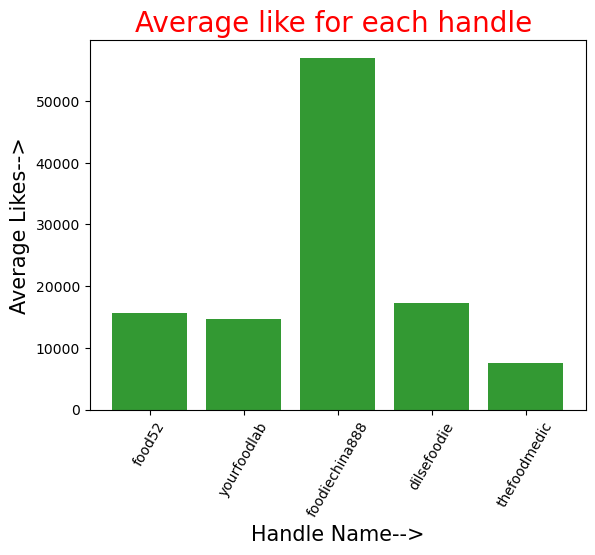

In [91]:
# plotting a bar graph for case - user vs average like of user
#using the data in 3.2
username = list(avg_user_like.keys())
avg_like = list(avg_user_like.values())

plt.bar(username,avg_like,color='g',alpha=0.8)
plt.ylabel("Average Likes-->",size = 15)
plt.xlabel("Handle Name-->", size = 15)
plt.title('Average like for each handle ',size = 20 ,color='red',alpha=1.0)
plt.xticks(rotation=60)
plt.show()

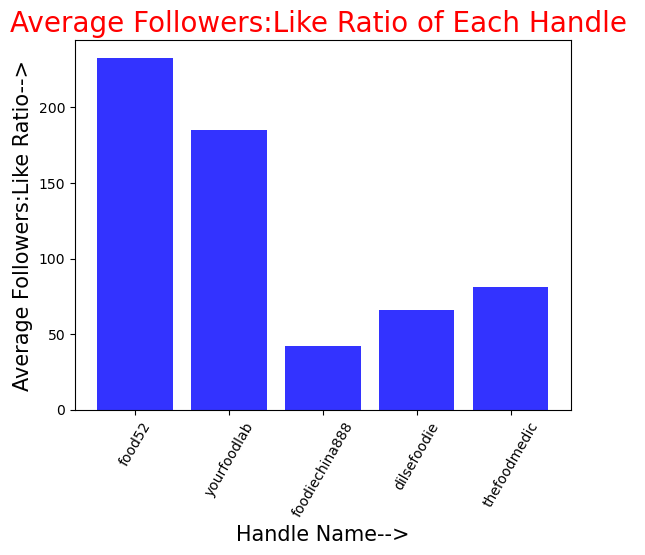

In [90]:
# plotting a bar graph for case - user ~ average followers:like ratio of each handle
# using in the data in 3.3
username = list(follower_like_ratio.keys())
avg_like = list(follower_like_ratio.values())

plt.bar(username,avg_like,color='b',alpha=0.8)
plt.ylabel("Average Followers:Like Ratio-->",size = 15)
plt.xlabel("Handle Name-->",size = 15)
plt.title('Average Followers:Like Ratio of Each Handle ', size = 20,color='red',alpha=1.0)
plt.xticks(rotation=60)
plt.show()


# ---------------------------------------------------------------------------------------------------------------